In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url = 'https://github.com/akashdeeps19/stacking-ensemble/blob/master/dataset_168.csv?raw=true'
data_96 = pd.read_csv(url)
data_96 = data_96.drop(columns='Unnamed: 0')
print(data_96.shape)
data_96.head()

(20736, 192)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191
0,28667,28204,27781,27139,26687,26333,27611,27355,27166,26848,26485,26280,25908,25577,25239,24848,24595,24276,23817,23649,23382,23084,22628,22576,22198,22091,21945,21740,21420,21217,20975,20901,20592,20814,20707,20536,20460,20323,20148,20228,...,25124,24825,24512,24284,23819,23667,23410,23250,23017,22891,22789,22514,22480,22292,22308,22202,22176,22166,21877,21877,21921,21656,21931,22094,21982,22140,22283,22477,23000,24043,24426,24872,25374,25756,26260,27177,27518,27902,28490,29191
1,22198,22091,21945,21740,21420,21217,20975,20901,20592,20814,20707,20536,20460,20323,20148,20228,20023,19911,19555,19302,19122,19047,19138,19104,19113,19095,18986,18608,18348,18184,18170,18369,18506,18677,18902,19176,19388,19766,19964,20227,...,21982,22140,22283,22477,23000,24043,24426,24872,25374,25756,26260,27177,27518,27902,28490,29191,29358,31027,31593,31469,31660,32221,32357,33081,33357,33699,34032,34746,34958,35447,35516,35654,35586,36191,35740,36005,36042,35963,36287,36063
2,19113,19095,18986,18608,18348,18184,18170,18369,18506,18677,18902,19176,19388,19766,19964,20227,20456,20756,21105,21251,21177,21410,21634,21843,21984,22228,22407,22517,22592,22843,23049,23108,23240,23376,23510,23622,23694,23813,23734,23722,...,33357,33699,34032,34746,34958,35447,35516,35654,35586,36191,35740,36005,36042,35963,36287,36063,35805,35941,35793,35919,35988,35896,35361,35551,35374,35234,34684,34325,34153,33649,33299,33465,33081,32933,32807,32715,32875,32672,32900,32828
3,21984,22228,22407,22517,22592,22843,23049,23108,23240,23376,23510,23622,23694,23813,23734,23722,23447,23180,22997,22819,22575,22416,22366,22232,22291,22271,22303,22217,22340,22434,22653,22857,22855,23123,23390,23844,24749,25575,26365,27007,...,35374,35234,34684,34325,34153,33649,33299,33465,33081,32933,32807,32715,32875,32672,32900,32828,32562,32896,32926,33004,33149,33020,33128,33524,33711,33847,34151,34675,35595,36332,36893,37413,37621,37733,37599,37501,37385,37287,37331,37086
4,22291,22271,22303,22217,22340,22434,22653,22857,22855,23123,23390,23844,24749,25575,26365,27007,27504,27887,27906,28141,28329,28536,28786,28952,28978,29330,29546,29658,30146,30451,30398,30566,30711,30590,30722,30581,30329,30134,30023,29623,...,33711,33847,34151,34675,35595,36332,36893,37413,37621,37733,37599,37501,37385,37287,37331,37086,37075,36995,36888,36798,36881,36748,36815,37104,36868,36745,36510,35928,35374,34872,34608,34415,34366,34372,34358,34704,34911,34351,34008,33765


In [ ]:
w = 168
h = 24

In [ ]:
X = data_96.iloc[:,:w].values.tolist()
y = data_96.iloc[:,w:].values.tolist()

In [ ]:
split = 0.7
train_len = int(split * len(X))
X_train = np.array(X[:train_len])
y_train = np.array(y[:train_len])
X_test = np.array(X[train_len:])
y_test = np.array(y[train_len:])
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14515, 168) (14515, 24) (6221, 168) (6221, 24)


In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# model = Sequential()
# model.add(Dense(64, input_shape=(w, ), activation='relu', name='dense_1'))
# model.add(Dense(16, activation='relu', name='dense_2'))
# model.add(Dense(1, activation='linear', name='dense_output'))
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model.summary()

model = Sequential()
model.add(Dense(128, input_shape=(w, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(16, activation='relu', name='dense_3'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               21632     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_output (Dense)         (None, 1)                 17        
Total params: 30,945
Trainable params: 30,945
Non-trainable params: 0
_________________________________________________________________


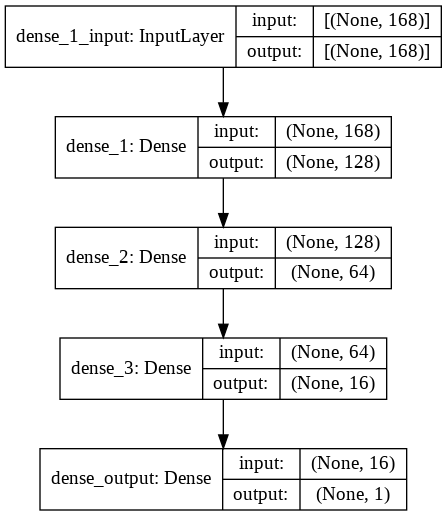

In [ ]:
import keras
dot_img_file = 'model_1.png'
keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
full_data = np.concatenate((X_train, X_test), axis=0)
predictions = []
histories = []
tot_mae = 0
for i in range(h):
    history = model.fit(X_train, y_train[:,i], epochs=50,verbose = 0)
    pred = model.predict(full_data)
    predictions.append(pred)
    histories.append(history)
    mse_nn, mae_nn = model.evaluate(X_test, y_test[:,i])
    tot_mae += mae_nn
    print(f"Mean squared error on test data for h = {i+1} : {mse_nn}")
    print(f"Mean absolute error on test data for h = {i+1} : {mae_nn}")
tot_mae/h

195/195 [==============================] - 0s 2ms/step - loss: 47381.6094 - mae: 172.2738
Mean squared error on test data for h = 1 : 47381.609375
Mean absolute error on test data for h = 1 : 172.27378845214844
195/195 [==============================] - 0s 2ms/step - loss: 48603.6484 - mae: 172.5557
Mean squared error on test data for h = 2 : 48603.6484375
Mean absolute error on test data for h = 2 : 172.5556640625
195/195 [==============================] - 0s 2ms/step - loss: 59373.5938 - mae: 191.2472
Mean squared error on test data for h = 3 : 59373.59375
Mean absolute error on test data for h = 3 : 191.24720764160156
195/195 [==============================] - 0s 2ms/step - loss: 74099.0391 - mae: 212.9427
Mean squared error on test data for h = 4 : 74099.0390625
Mean absolute error on test data for h = 4 : 212.94268798828125
195/195 [==============================] - 0s 2ms/step - loss: 101594.3281 - mae: 251.5814
Mean squared error on test data for h = 5 : 101594.328125
Mean absol

332.0758406321208

In [ ]:
from google.colab import files
predictions = np.array(predictions)
predictions = predictions.reshape(h,-1)
df = pd.DataFrame(predictions.T)
print(df.shape)
print(df.head())
df.to_csv('ann_output_168.csv')
files.download('ann_output_168.csv')

(20736, 24)
             0             1   ...            22            23
0  22196.550781  22116.457031  ...  26682.189453  27541.351562
1  30015.236328  30903.800781  ...  36129.703125  36662.375000
2  36215.171875  36200.488281  ...  33152.960938  33446.753906
3  33000.000000  33136.804688  ...  36693.582031  37230.605469
4  37318.769531  36963.730469  ...  32957.980469  33500.011719

[5 rows x 24 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
preds = np.array(df.iloc[14515:,:].values.tolist())
mae_h = np.mean(np.abs(y_test-preds),axis = 0)
print(mae_h)
np.mean(mae_h)

[172.27383685 172.55567992 191.24722054 212.94270603 251.58147398
 288.30734075 310.53322102 272.41875364 336.21324257 303.32462627
 308.39062374 311.4348951  351.44913587 331.50846773 378.25605183
 362.39680775 382.61284045 367.95501031 400.66146168 448.74748678
 456.3645195  431.62722501 456.32497068 470.69275878]


332.07584819866264